# QCNN : Quantum Convolutional Neural Network

In [1]:
import pennylane.numpy as np
from model_parameters import ModelParameters
from helper.torch_training import run_torch_sequence
from helper.scores import Metrics
from helper.quantum import create_qcnn_model

## Data loading

In [2]:
model_parameters = ModelParameters()
x_train, x_test, y_train, y_test = model_parameters.get_htru_2()

## Model definition

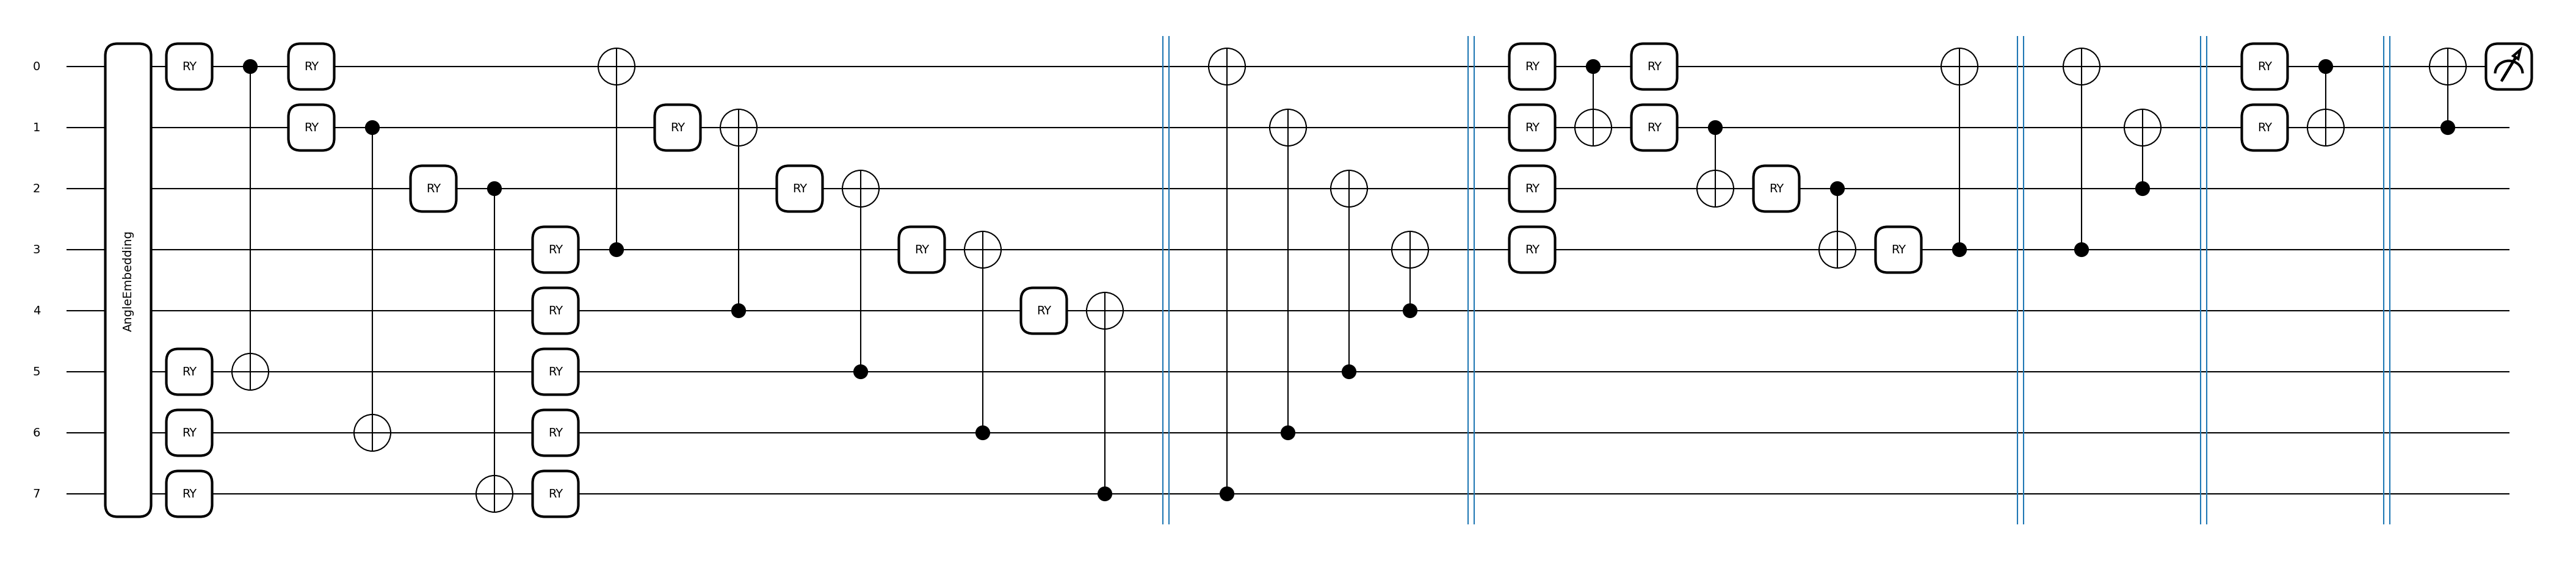

In [3]:
model = create_qcnn_model(model_parameters, True)

def model_creator():
    return create_qcnn_model(model_parameters, False)

## Training QCNN

### Normal QCNN

QCNN trained on each data without batches.

100%|██████████| 6/6 [1:01:10<00:00, 611.74s/it]


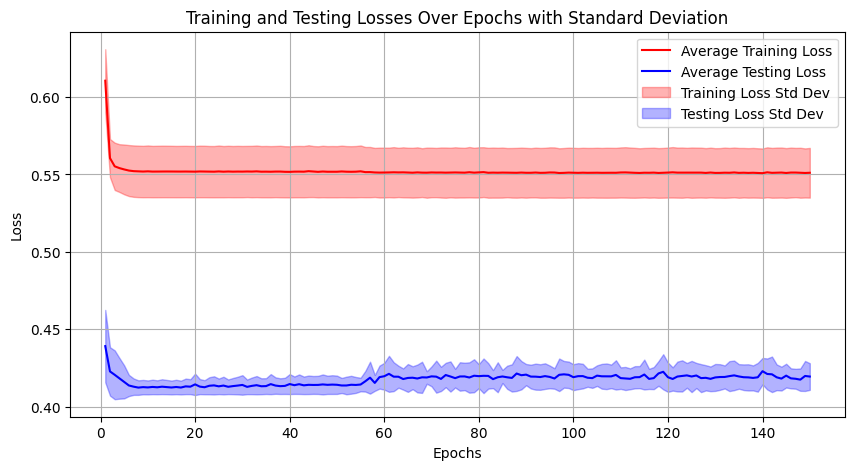

Pour 6 runs:
Accuracy: 0.945 ± 0.006
Balanced Accuracy: 0.726 ± 0.028
Recall: 0.452 ± 0.058
Specificity: 1.000 ± 0.001
Precision: 0.993 ± 0.016
NPV: 0.943 ± 0.007
G-Mean: 0.670 ± 0.043
Informedness: 0.451 ± 0.057
Training Duration: 611.686 ± 7.424
Testing Duration: 0.040 ± 0.003


In [7]:
metrics = Metrics()
run_torch_sequence(model_parameters, model_creator, x_train, y_train, x_test, y_test, metrics, batch_size=1)
metrics.display()

### Batched QCNN

QCNN that is trained on batches of 10.

100%|██████████| 6/6 [07:01<00:00, 70.27s/it]


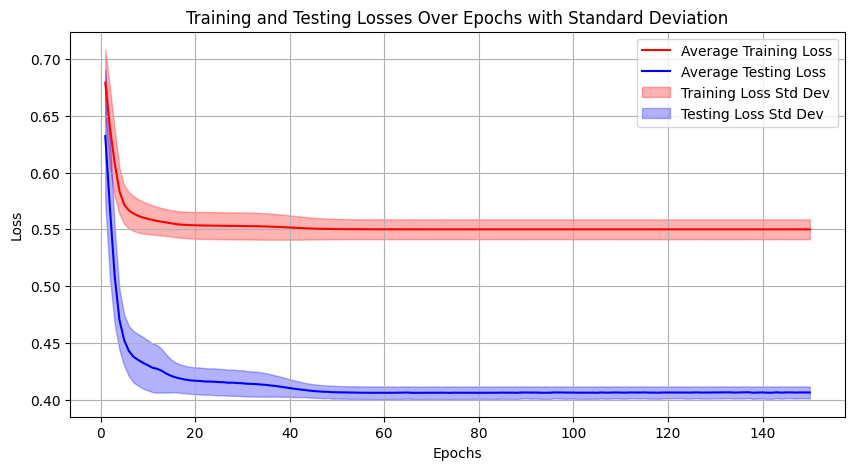

Pour 6 runs:
Accuracy: 0.954 ± 0.009
Balanced Accuracy: 0.742 ± 0.038
Recall: 0.483 ± 0.077
Specificity: 1.000 ± 0.000
Precision: 1.000 ± 0.000
NPV: 0.952 ± 0.009
G-Mean: 0.693 ± 0.055
Informedness: 0.483 ± 0.077
Training Duration: 70.214 ± 0.716
Testing Duration: 0.043 ± 0.007


In [6]:
metrics = Metrics()
run_torch_sequence(model_parameters, model_creator, x_train, y_train, x_test, y_test, metrics, batch_size=10)
metrics.display()

### All batches

QCNN that is trained on all batches at once.

100%|██████████| 6/6 [01:31<00:00, 15.24s/it]


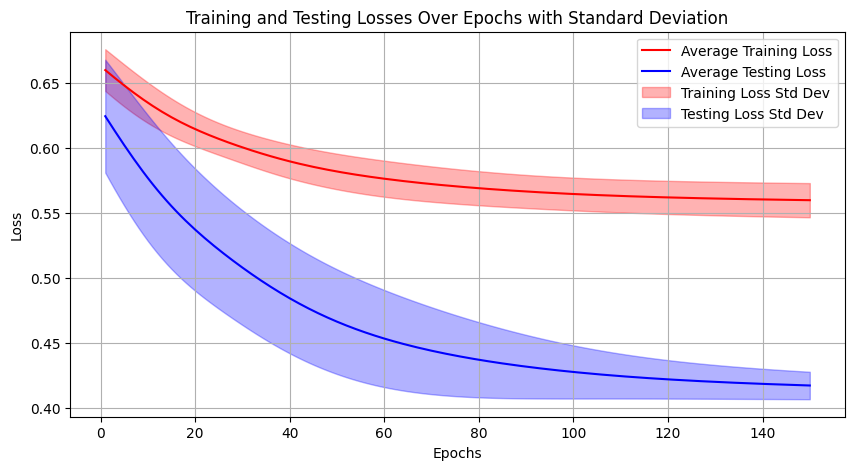

Pour 6 runs:
Accuracy: 0.953 ± 0.008
Balanced Accuracy: 0.759 ± 0.029
Recall: 0.520 ± 0.061
Specificity: 0.998 ± 0.005
Precision: 0.974 ± 0.058
NPV: 0.953 ± 0.007
G-Mean: 0.719 ± 0.042
Informedness: 0.517 ± 0.058
Training Duration: 15.196 ± 0.156
Testing Duration: 0.036 ± 0.001


In [5]:
metrics = Metrics()
run_torch_sequence(model_parameters, model_creator, x_train, y_train, x_test, y_test, metrics, batch_size=model_parameters.training_samples)
metrics.display()